In [1]:
import os
from pathlib import Path
import git

ROOT_DIR = Path(git.Repo('.', search_parent_directories=True).working_tree_dir)
CWD = os.getcwd()
os.chdir(os.path.join(ROOT_DIR, "utilities"))
from testing import * # If MATLAB is not installed, open utilities and set to False
from plotting import *
os.chdir(CWD)
np.random.seed(0)

In [2]:
points = [(1, -1), (1, 2), (0.2, 2), (5, 5)]
labels = ['A', 'B', 'C', 'D']
num_points = len(points)

In [3]:
def visualize_prior_pdf(params, sample=[], log_scale = False, n_samples=1000, interval = None, debug=True, bw = 0.05, bw_log = 0.05, ax=None):
    """
    Visualize the gap between the empirical CDF/PDF and the Computed CDF/PDF.

    Args:
        sample (np.ndarray): Observed data.
        r (float): r value.
        eta (float): eta value.
        n_samples (int): Number of samples for the computed CDF/PDF.
        all_cdfs (dict): Dictionary containing computed CDFs.
        group (int or None): Group index (for titling purposes).

    Returns:
        distance (float): The Kolmogorov-Smirnov statistic.
        location (float): The location of the maximum deviation between the empirical and computed CDFs.
    """
    r, eta = params
    xs_pdf, null_cdf = compute_prior_cdf(r=r, eta=eta, n_samples=n_samples,  tail_bound=0.0001, enforce_assert=False, debug=debug, return_xs=True)
    null_pdf = null_cdf.derivative()(xs_pdf) 

    if log_scale:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

        # Empirical CDF vs Computed CDF
        ax1.set_xlim(left = -25, right = 25)
        if interval:
            ax1.set_xlim(left = interval[0], right = interval[1])
        ax1.plot(xs_pdf, null_pdf, label='Computed PDF')
        ax1.set_title(f'Prior (r={params[0]}, eta={params[1]})')
        ax1.set_title(f'Log Scale: Prior (r={params[0]}, eta={params[1]})')

        # Log Scale
        ax2.set_xlim(left = -25, right = 25)
        if interval:
            ax2.set_xlim(left = interval[0], right = interval[1])
        ax2.set_ylim(bottom = 10**-4, top=10)
        sns.kdeplot(ax = ax2, x = sample, bw_method = bw, log_scale=[False, True], label = f"Empirical PDF (KDE, bw={bw_log})")
        ax2.plot(xs_pdf, null_pdf, label = "Computed PDF")

        ax1.legend()
        ax2.legend()

        plt.tight_layout()
        plt.show()    
        
    else:
        fig, ax1 = plt.subplots(1, 1, figsize=(8, 6))

        # Empirical CDF vs Computed CDF
        ax1.set_xlim(left = -25, right = 25)
        if interval:
            ax1.set_xlim(left = interval[0], right = interval[1])
        ax1.plot(xs_pdf, null_pdf, label='Computed PDF')
        ax1.set_title(f'Prior (r={params[0]}, eta={params[1]})')
        #ax1.legend()
        plt.tight_layout()
        plt.show() 

    return fig

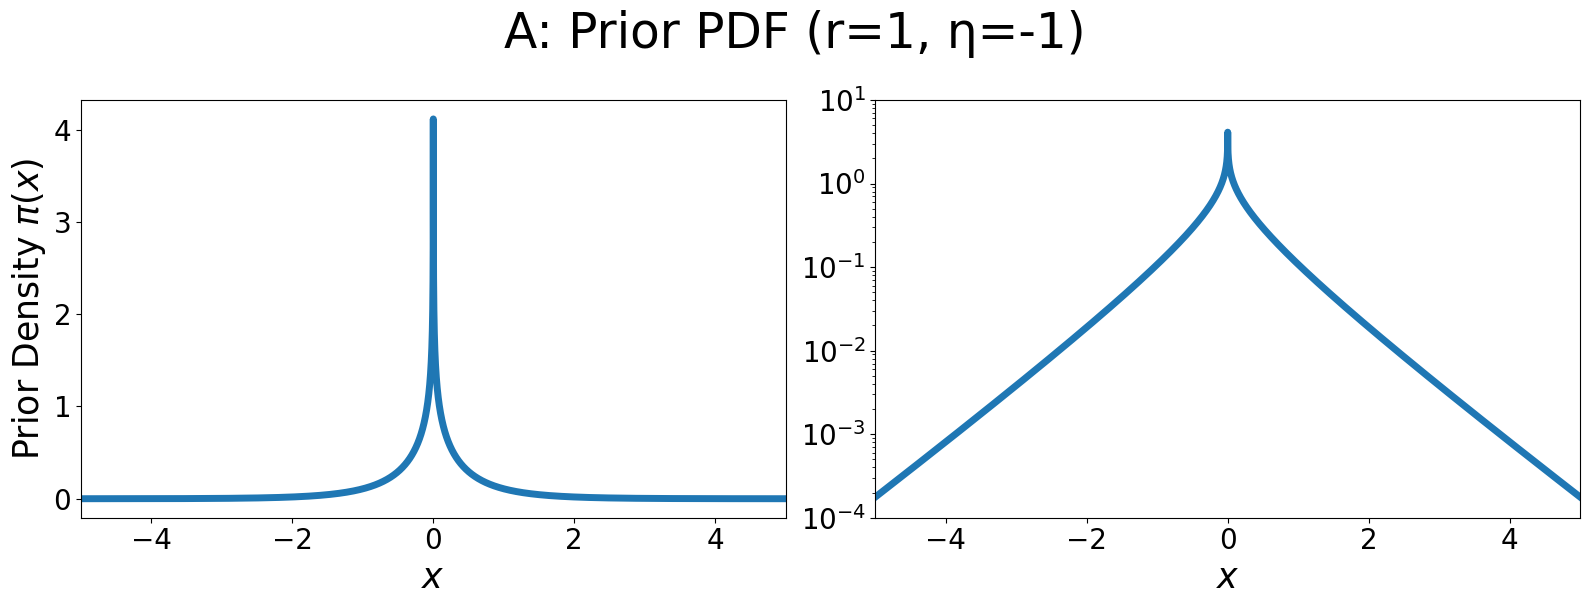

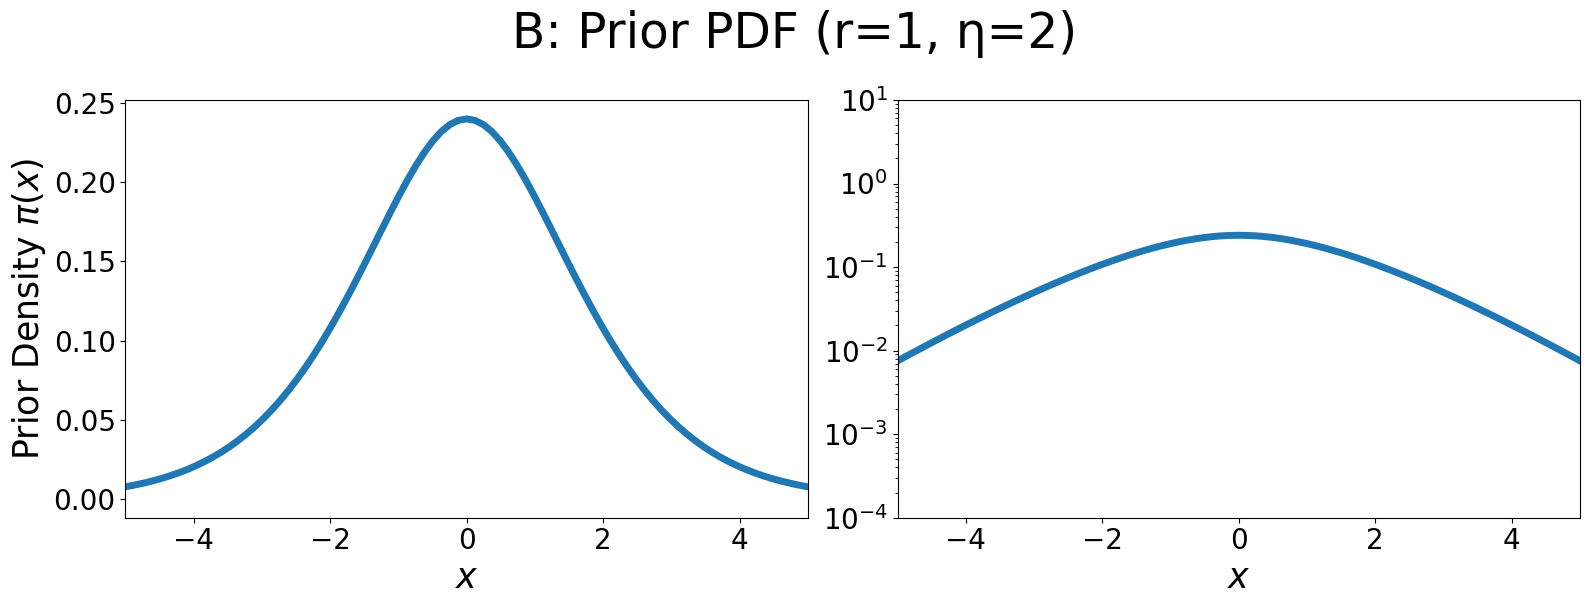

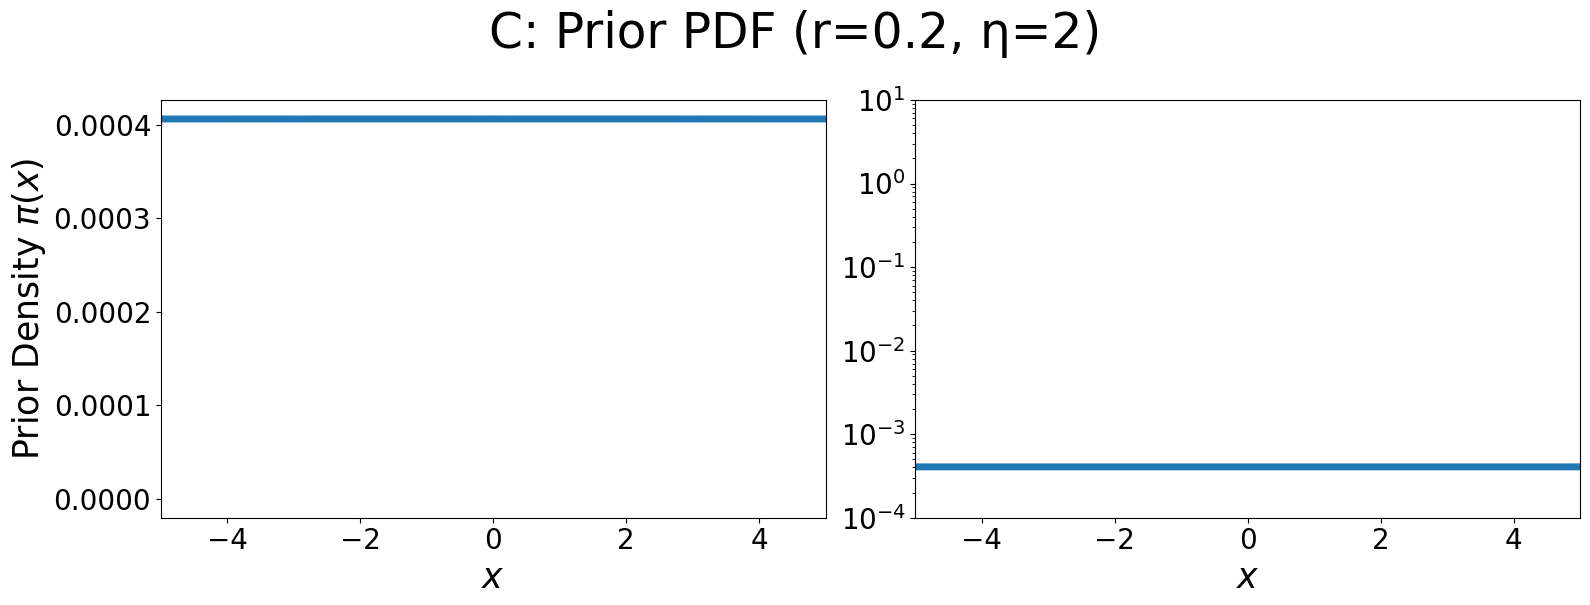

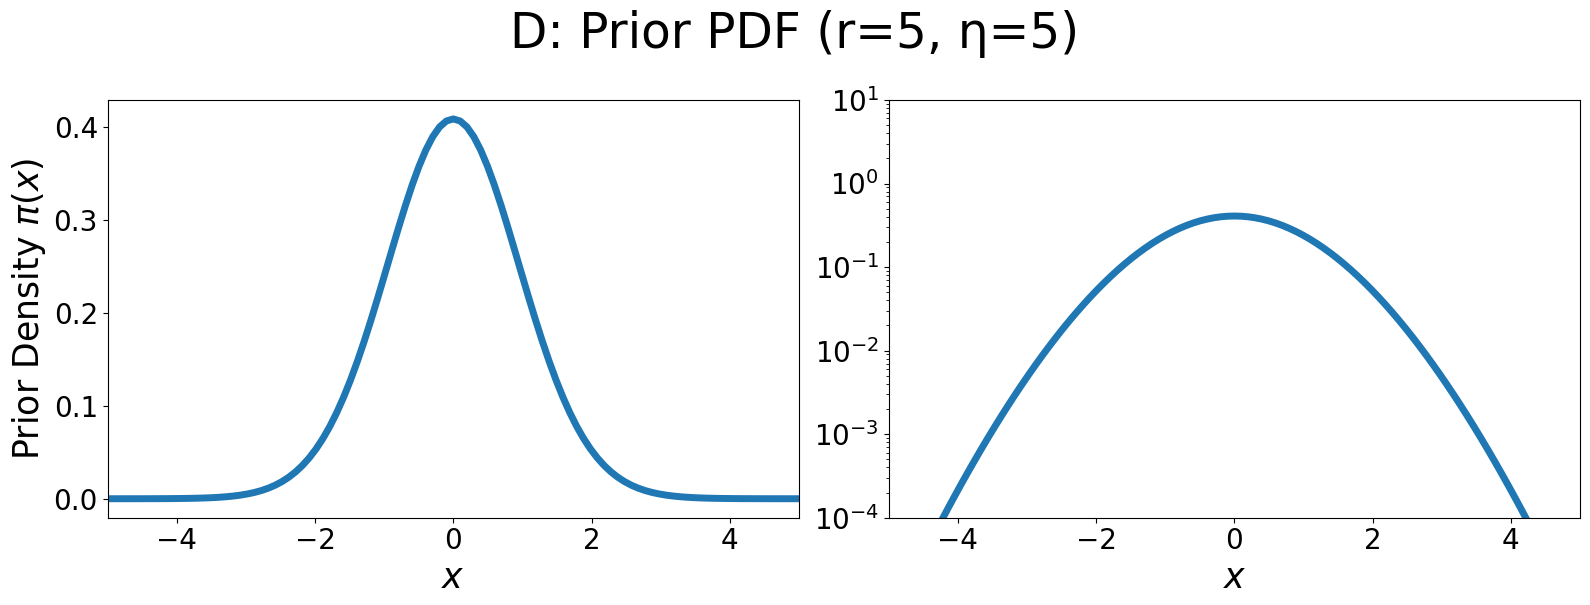

In [4]:
def visualize_prior(r, eta, show_log=True, interval=(0, 5), n_samples=1000, debug=False, title=""):
    """
    Visualize generalized gamma PDF, prior PDF, and optionally log prior PDF.
    
    Args:
        r (float): r parameter for generalized gamma
        eta (float): eta parameter for generalized gamma
        show_log (bool): Whether to show the log scale plot
        interval (tuple): x-axis limits (min, max)
        n_samples (int): Number of samples for computed PDF
        debug (bool): Debug flag for compute_prior_cdf
    
    Returns:
        matplotlib.figure.Figure: The generated figure
    """
    # Calculate number of subplots needed
    n_plots = 2 if show_log else 1
    
    # Create figure with appropriate number of subplots
    fig, axes = plt.subplots(1, n_plots, figsize=(8 * n_plots, 6))

    fig.suptitle(f'{title}Prior PDF (r={r}, η={eta})', fontsize=35, y=1)
    
    # Get prior PDF
    xs_prior, null_cdf = compute_prior_cdf(
        r=r, 
        eta=eta, 
        n_samples=n_samples,
        tail_bound=0.0001,
        enforce_assert=False,
        debug=debug,
        return_xs=True
    )
    null_pdf = null_cdf.derivative()(xs_prior)

    # Plot prior PDF
    axes[0].plot(xs_prior, null_pdf, label='Computed PDF', linewidth=linewidth)
    #axes[0].set_title(f'Prior (r={r}, η={eta})')
    axes[0].set_xlim(-interval[1], interval[1])
    axes[0].set_xlabel(r'$x$', fontsize=25)
    axes[0].set_ylabel(r'Prior Density $\pi(x)$', fontsize=25)
    axes[0].tick_params(axis='both', which='major', labelsize=20)
    
    # Plot log prior PDF if requested
    if show_log:
        axes[1].plot(xs_prior, null_pdf, label='Computed PDF', linewidth=linewidth)
        #axes[1].set_title(f'Log Scale: Prior (r={r}, η={eta})')
        axes[1].set_xlim(-interval[1], interval[1])
        axes[1].set_yscale('log')
        axes[1].set_ylim(bottom=10**-4, top=10)
        axes[1].set_xlabel(r'$x$', fontsize=25)
        axes[1].set_ylabel('', fontsize=25)
        axes[1].tick_params(axis='both', which='major', labelsize=20)
    
    plt.tight_layout()
    return fig

linewidth=5
for i in range(len(points)):
    fig = visualize_prior(*points[i], show_log=True, n_samples=2000, title=f'{labels[i]}: ')
    r, eta = points[i]
    filename = f'../plots/prior_log_r{r}_eta{eta}.jpg'
    fig.savefig(filename, dpi=1000, bbox_inches='tight')
    
    plt.show()
    plt.close(fig) 

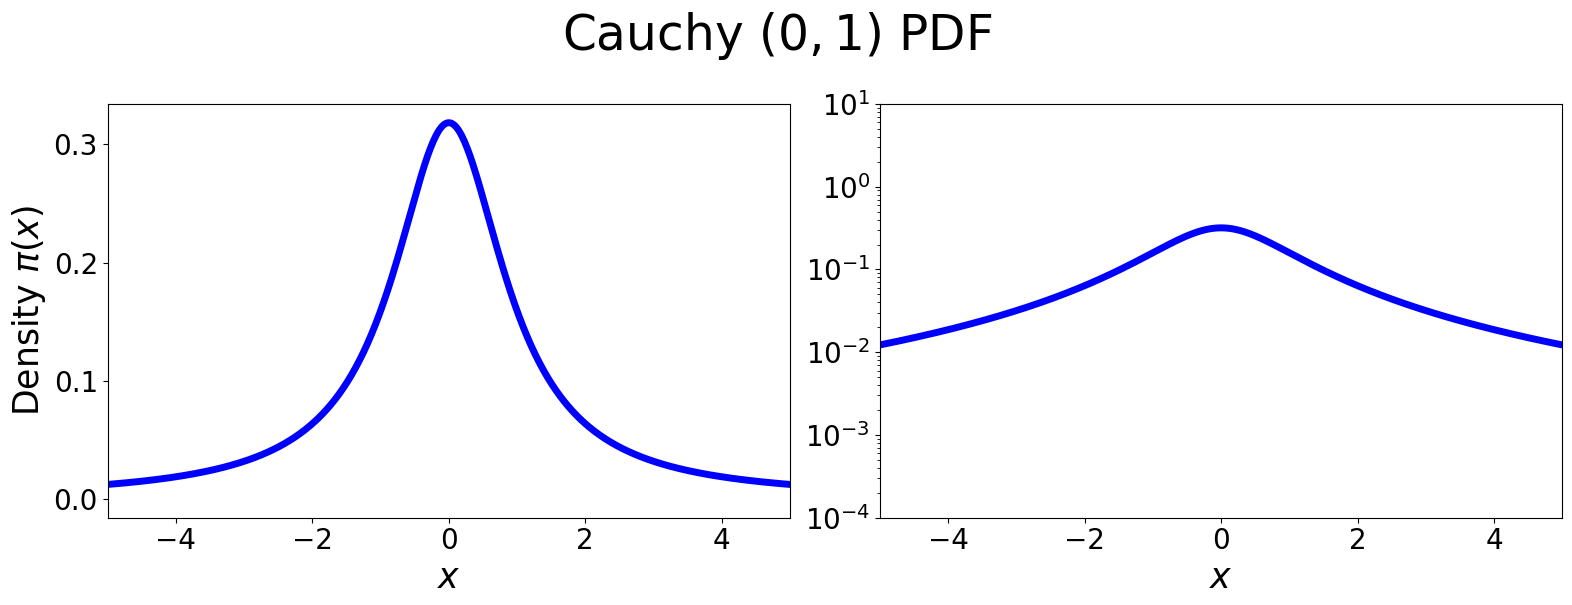

In [5]:
n_plots = 2
show_log = True
title = r'Cauchy $(0, 1)$ PDF'
# Create figure with appropriate number of subplots
fig, axes = plt.subplots(1, n_plots, figsize=(8 * n_plots, 6))
xs_prior = np.linspace(-1000, 1000, 100000)
cdf_student_t = scipy.stats.t.pdf(xs_prior, df=1)
fig.suptitle(title, fontsize=35, y=1)

# Plot Student t PDF (dof=1)
axes[0].plot(xs_prior, cdf_student_t, label='Cauchy (0, 1)', color='blue', linewidth=linewidth)
axes[0].set_xlim(-5, 5)
axes[0].set_xlabel(r'$x$', fontsize=25)
axes[0].set_ylabel(r'Density $\pi(x)$', fontsize=25)
axes[0].tick_params(axis='both', which='major', labelsize=20)

# Plot log Student t PDF if requested
if show_log:
    axes[1].plot(xs_prior, cdf_student_t, label='Cauchy (0, 1)', color='blue', linewidth=linewidth)
    axes[1].set_xlim(-5, 5)
    axes[1].set_yscale('log')
    axes[1].set_ylim(bottom=10**-4, top=10)
    axes[1].set_xlabel(r'$x$', fontsize=25)
    axes[1].set_ylabel(r'', fontsize=25)
    axes[1].tick_params(axis='both', which='major', labelsize=20)

plt.tight_layout()
plt.show()

filename = f'../plots/prior_log_cauchy.jpg'
fig.savefig(filename, dpi=1000, bbox_inches='tight')


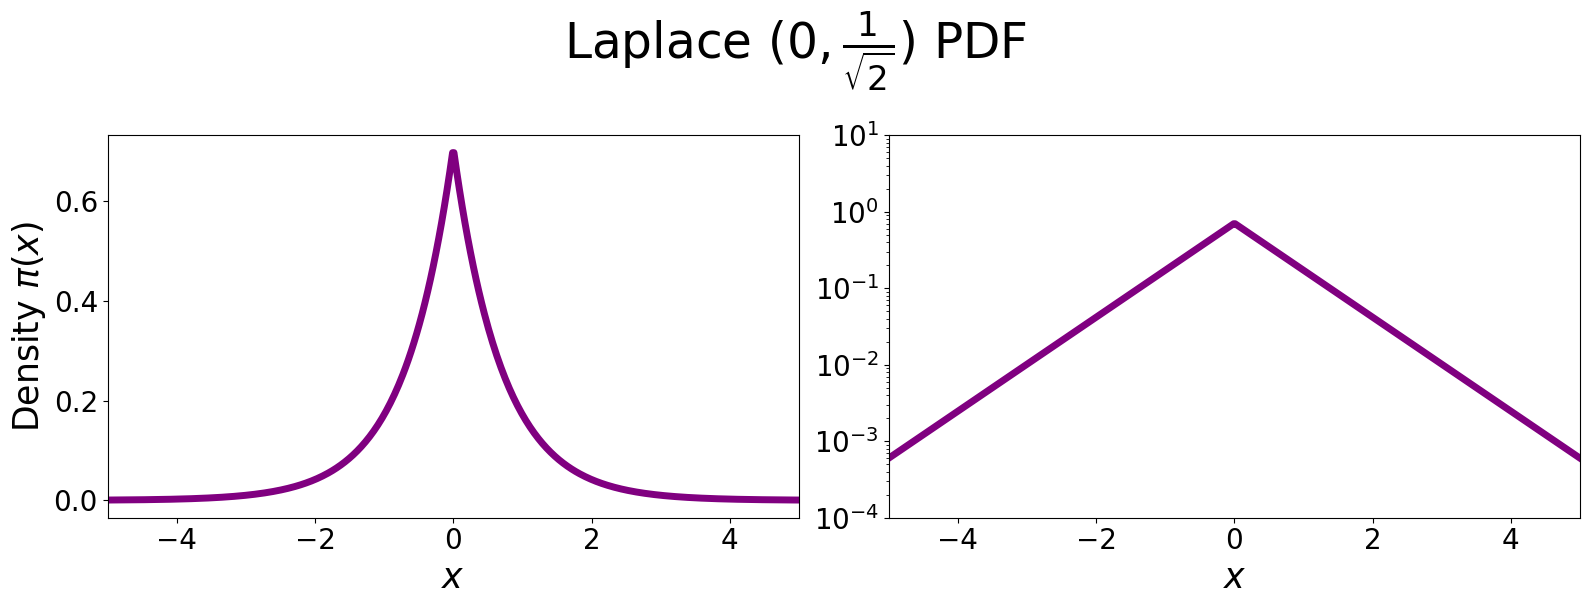

In [6]:
n_plots = 2
show_log = True
title = r'Laplace $(0, \frac{1}{\sqrt{2}})$ PDF'
# Create figure with appropriate number of subplots
fig, axes = plt.subplots(1, n_plots, figsize=(8 * n_plots, 6))
xs_prior = np.linspace(-1000, 1000, 100000)
cdf_laplace = scipy.stats.laplace.pdf(xs_prior, loc=0, scale=1/np.sqrt(2))
fig.suptitle(title, fontsize=35, y=1)

# Plot Laplace PDF
axes[0].plot(xs_prior, cdf_laplace, label=r'Laplace $(0, \frac{1}{\sqrt{2}})$', color='purple', linewidth=linewidth)
axes[0].set_xlim(-5, 5)
axes[0].set_xlabel(r'$x$', fontsize=25)
axes[0].set_ylabel(r'Density $\pi(x)$', fontsize=25)
axes[0].tick_params(axis='both', which='major', labelsize=20)

# Plot log Laplace PDF if requested
if show_log:
    axes[1].plot(xs_prior, cdf_laplace, label=r'Laplace $(0, \frac{1}{\sqrt{2}})$', color='purple', linewidth=linewidth)
    axes[1].set_xlim(-5, 5)
    axes[1].set_yscale('log')
    axes[1].set_ylim(bottom=10**-4, top=10)
    axes[1].set_xlabel(r'$x$', fontsize=25)
    axes[1].set_ylabel(r'', fontsize=25)
    axes[1].tick_params(axis='both', which='major', labelsize=20)

plt.tight_layout()
plt.show()

filename = f'../plots/prior_log_laplace.jpg'
fig.savefig(filename, dpi=1000, bbox_inches='tight')


In [7]:
def visualize_distributions(r, eta, show_log=False, interval=(0, 5), n_samples=1000, debug=False, title=""):
    """
    Visualize generalized gamma PDF, prior PDF, and optionally log prior PDF.
    
    Args:
        r (float): r parameter for generalized gamma
        eta (float): eta parameter for generalized gamma
        show_log (bool): Whether to show the log scale plot
        interval (tuple): x-axis limits (min, max)
        n_samples (int): Number of samples for computed PDF
        debug (bool): Debug flag for compute_prior_cdf
    
    Returns:
        matplotlib.figure.Figure: The generated figure
    """
    # Calculate number of subplots needed
    n_plots = 3 if show_log else 2
    
    # Create figure with appropriate number of subplots
    fig, axes = plt.subplots(1, n_plots, figsize=(8 * n_plots, 6))
    
    # Generate x values for generalized gamma
    xs_gamma = np.linspace(0, 100, 100000)
    beta = (eta + 1.5)/r
    pdf_gamma = stats.gengamma.pdf(xs_gamma, a=beta, c=r)

    fig.suptitle(f'{title}Generalized Gamma PDF alongside Prior PDF (r={r}, η={eta})', fontsize=30, y=1)
    
    # Get prior PDF
    xs_prior, null_cdf = compute_prior_cdf(
        r=r, 
        eta=eta, 
        n_samples=n_samples,
        tail_bound=0.0001,
        enforce_assert=False,
        debug=debug,
        return_xs=True
    )
    null_pdf = null_cdf.derivative()(xs_prior)
    
    # Plot generalized gamma PDF
    axes[0].plot(xs_gamma, pdf_gamma)
    #axes[0].set_title(f'Generalized Gamma (r={r}, η={eta})')
    axes[0].set_xlim(interval)
    axes[0].set_xlabel('Value')
    axes[0].set_ylabel('Density', fontsize=20)
    
    # Plot prior PDF
    axes[1].plot(xs_prior, null_pdf, label='Computed PDF')
    #axes[1].set_title(f'Prior (r={r}, η={eta})')
    axes[1].set_xlim(-interval[1], interval[1])
    axes[1].set_xlabel('Value')
    axes[1].set_ylabel('Density', fontsize=20)
    
    # Plot log prior PDF if requested
    if show_log:
        axes[2].plot(xs_prior, null_pdf, label='Computed PDF')
        #axes[2].set_title(f'Log Scale: Prior (r={r}, η={eta})')
        axes[2].set_xlim(-interval[1], interval[1])
        axes[2].set_yscale('log')
        axes[2].set_ylim(bottom=10**-4, top=10)
        axes[2].set_xlabel('Value')
        axes[2].set_ylabel('Log Density', fontsize=20)
    
    plt.tight_layout()
    return fig

# for i in range(5):
#     fig = visualize_distributions(*points[i], show_log=True, n_samples=200, title=f'{labels[i]}: ')
#     r, eta = points[i]
#     filename = f'gengamma_prior_log_r{r}_eta{eta}.png'
#     fig.savefig(filename, dpi=600, bbox_inches='tight')
    
#     plt.show()
#     plt.close(fig) 

In [8]:
# for i in range(num_points):
#     xs = np.linspace(0, 100, 100000)
#     r, eta = points[i]
#     beta = (eta + 1.5)/r 
    
#     pdf = stats.gengamma.pdf(xs, a = beta, c = r)
#     fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    
#     ax.plot(xs, pdf)
#     ax.set_title(f'{labels[i]}: Generalized Gamma (r={r}, η={eta})', fontsize=20)
#     ax.set_xlim(0, 2)

#     filename = f'gengamma_r{r}_eta{eta}.png'
#     fig.savefig(os.path.join("plots", filename), dpi=600, bbox_inches='tight')
    
#     plt.show()
#     plt.close(fig) 

C:\Users\yashd\AppData\Local\Temp\ipykernel_32632\3903749375.py:21: RuntimeWarning: invalid value encountered in scalar divide
  return scipy.special.gamma((eta+2.5)/r) / scipy.special.gamma((eta+1.5)/r)
c:\Users\yashd\.conda\envs\hbmv_backup2\Lib\site-packages\scipy\optimize\_optimize.py:2973: RuntimeWarning: invalid value encountered in scalar divide
  w = xb - ((xb - xc) * tmp2 - (xb - xa) * tmp1) / denom
C:\Users\yashd\AppData\Local\Temp\ipykernel_32632\3903749375.py:142: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "vk" (-> color='k'). The keyword argument will take precedence.
  ax.plot(y_axis_loc - 1.5/(abs(y_limits[0]) + abs(y_limits[1])), 0, 'vk', transform=ax.transAxes, clip_on=False, color=colors['cauchy'])
C:\Users\yashd\AppData\Local\Temp\ipykernel_32632\3903749375.py:151: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] +

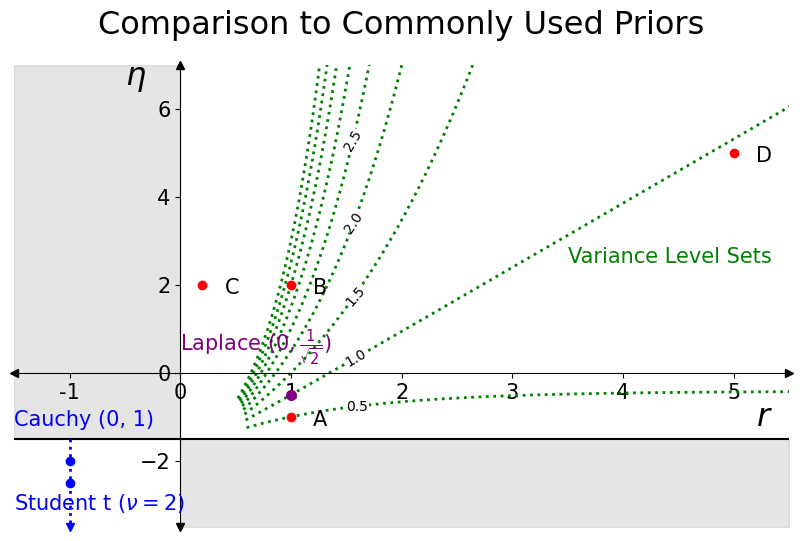

In [18]:
# Required imports (add these at the top)
import numpy as np
import scipy.special
import scipy.optimize
import matplotlib.pyplot as plt

# Color configuration
colors = {
    'shaded_region': 'grey',
    'variance_level_set': 'green',
    'laplace': 'purple',
    'cauchy': 'blue',
    'student_t': 'blue',
    'axis_arrows': 'black',
    'annotation': 'black'
}

# Helper functions for mathematical calculations
def gen_gamma_mean(r, eta):
    """Calculate generalized gamma mean."""
    return scipy.special.gamma((eta+2.5)/r) / scipy.special.gamma((eta+1.5)/r)

def find_eta_for_target_var(r, target_var):
    """Find eta value for a given target variance."""
    def objective(eta):
        return (gen_gamma_mean(r, eta) - target_var)**2
    result = scipy.optimize.minimize_scalar(objective)
    return result.x

def get_level_set(target_var, k=50):
    """Generate level set points for a given target variance."""
    r_vals, eta_vals = [], []
    for r in np.linspace(0.01, 10, 1000):
        eta = find_eta_for_target_var(r, target_var)
        r_vals.append(r)
        eta_vals.append(eta)
    return r_vals[k:], eta_vals[k:]

# Plot configuration
plot_config = {
    'x_limits': (-1.5, 5.5),
    'y_limits': (-3.5, 7),
    'font_multiplier': 1,
    'font_addition': 3,
    'linewidth': 2,
    'figsize': (10, 6)
}

x_limits = plot_config['x_limits']
y_limits = plot_config['y_limits']

# Initialize plot
fig, ax = plt.subplots(figsize=plot_config['figsize'])

# Add shaded region for constraints
x_shade = np.array([0, plot_config['x_limits'][1]])
y_shade = np.array([-1.5, -1.5])
ax.fill_between(x_shade, plot_config['y_limits'][0], y_shade, color=colors['shaded_region'], alpha=0.2)
ax.plot(x_shade, y_shade, 'k-', linewidth=1.5)

x_shade = np.array([plot_config['x_limits'][0], 0])
y_shade = np.array([-1.5, -1.5])
ax.fill_between(x_shade, y_shade, plot_config['y_limits'][1], color=colors['shaded_region'], alpha=0.2)
ax.plot(x_shade, y_shade, 'k-', linewidth=1.5)

# Plot variance level sets
target_vars = np.arange(0.5, 5, 0.5)
for target_var in target_vars:
    r_vals, eta_vals = get_level_set(target_var, k=60 - int(2*target_var))
    
    # Create break in lines for clarity
    if target_var > 5:
        mid_idx = 50
        break_start = mid_idx - int(5/target_var)
        break_end = mid_idx + int(5/target_var)
    else: 
        mid_idx = 100
        break_start = mid_idx - int(5/target_var)
        break_end = mid_idx + int(5/target_var)
    
    # Plot line segments
    ax.plot(r_vals[:break_start], eta_vals[:break_start], linestyle='dotted', c=colors['variance_level_set'], linewidth=plot_config['linewidth'])
    ax.plot(r_vals[break_end:], eta_vals[break_end:], linestyle='dotted', c=colors['variance_level_set'], linewidth=plot_config['linewidth'])
    
    # Add labels with angle calculation
    dx = r_vals[mid_idx + 1] - r_vals[mid_idx] if mid_idx + 1 < len(r_vals) else 0
    dy = eta_vals[mid_idx + 1] - eta_vals[mid_idx] if mid_idx + 1 < len(r_vals) else 0
    angle = max(np.degrees(np.arctan2(dy, dx)) - 25, 0)
    ax.annotate(f'{target_var}', 
                (r_vals[mid_idx], eta_vals[mid_idx]),
                xytext=(0, 0), textcoords='offset points',
                fontsize=10, rotation=angle,
                va='center', ha='center',
                bbox=dict(facecolor='white', edgecolor='none', pad=0.5))

# Add special distributions
ax.plot([-1, -1], [-1.5, plot_config['y_limits'][0]], color=colors['cauchy'], linestyle='dotted', linewidth=plot_config['linewidth'])
ax.scatter(1, -0.5, color=colors['laplace'], linewidth=plot_config['linewidth'], label=r'Laplace $(0, \frac{1}{\sqrt{2}})$', zorder=10)
ax.scatter(-1, -2, color=colors['cauchy'], label='Cauchy (Student t ($\nu=1$))', zorder=10)
ax.scatter(-1, -2.5, color=colors['student_t'], label=r'Student t ($\nu=2$)', zorder=10)

# Add annotations
font_size = plot_config['font_multiplier']*12 + plot_config['font_addition']
ax.annotate(r'Laplace $(0, \frac{1}{\sqrt{2}})$', xy=(plot_config['x_limits'][1], -1), xytext=(0, 0.5), 
            textcoords='data', color=colors['laplace'], fontsize=font_size, zorder=10)
ax.annotate(r'Student t ($\nu=2$)', xy=(-1, -2), xytext=(-1.5, -3.1), 
            textcoords='data', color=colors['student_t'], fontsize=font_size)
ax.annotate(r'Cauchy (0, 1)', xy=(-1, -2), xytext=(-1.5, -1.2), 
            textcoords='data', color=colors['cauchy'], fontsize=font_size, zorder=10)

ax.annotate('Variance Level Sets', xy=(3.5, 2.5), 
            textcoords='data', color=colors['variance_level_set'], fontsize=font_size)

# Configure axes
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.tick_params(axis='both', which='major', labelsize=15)
ax.yaxis.set_label_coords(0, 1.02)

# Add axis labels and arrows
ax.text(plot_config['x_limits'][1] - 0.3, -1, r'$r$', ha='left', va='center', 
        fontsize=plot_config['font_multiplier']*20 + plot_config['font_addition'])
ax.text(-0.5, plot_config['y_limits'][1] - 0.3, r'$\eta$', ha='left', va='center', 
        fontsize=plot_config['font_multiplier']*20 + plot_config['font_addition'])
ax.set_ylabel('', rotation=0, 
              fontsize=plot_config['font_multiplier']*20 + plot_config['font_addition'])
ax.set_xlabel('', rotation=0, 
              fontsize=plot_config['font_multiplier']*20 + plot_config['font_addition'])

# Add axis arrows
x_axis_loc = np.abs(y_limits[0])/(np.abs(y_limits[0]) + np.abs(y_limits[1]))
y_axis_loc = np.abs(x_limits[0])/(np.abs(x_limits[0]) + np.abs(x_limits[1]))

ax.plot(1, x_axis_loc, '>', transform=ax.transAxes, clip_on=False, color=colors['axis_arrows'])
ax.plot(y_axis_loc, 1, '^', transform=ax.transAxes, clip_on=False, color=colors['axis_arrows'])
ax.plot(0, x_axis_loc, '<', transform=ax.transAxes, clip_on=False, color=colors['axis_arrows'])
ax.plot(y_axis_loc, 0, 'v', transform=ax.transAxes, clip_on=False, color=colors['axis_arrows'])
ax.plot(y_axis_loc - 1.5/(abs(y_limits[0]) + abs(y_limits[1])), 0, 'vk', transform=ax.transAxes, clip_on=False, color=colors['cauchy'])

# Set plot limits and title
ax.set_xlim(plot_config['x_limits'])
ax.set_ylim(plot_config['y_limits'])
ax.set_title('Comparison to Commonly Used Priors', y=1.05, 
             fontsize=plot_config['font_multiplier']*20 + plot_config['font_addition'])

# Fix origin tick labels
ax.set_xticklabels([''] + [str(int(x)) for x in ax.get_xticks()[1:]])

# Plot and label points
for (x, y), label in zip(points, labels):
    ax.scatter(x, y, color='red', zorder=10)
    ax.annotate(label, xy=(x, y), xytext=(x + 0.2, y - 0.2), textcoords='data', color=colors['annotation'], fontsize=font_size)

# Save and display plot
plt.savefig('../plots/compare_priors_schematic.jpg', dpi=1000, bbox_inches='tight')
plt.show()
